# Author: Mayank Raj

# Task 1: Prediction using Supervised ML

### Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data set

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")
data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 1. Understanding the data

In [3]:
print("The shape of data : ",data.shape)

The shape of data :  (25, 2)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The data has no null values and the data type of columns are float and int type, therefore no need to perform data cleaning.

#### As the data is having two variable, first plot the graph between the columns to get an idea of relation between features of our dataset

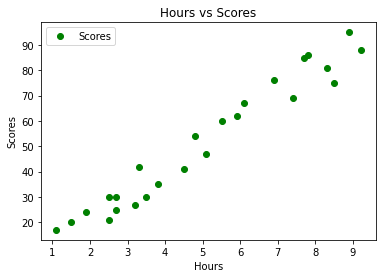

In [6]:
data.plot(x='Hours',y='Scores',style='og')
plt.title("Hours vs Scores")
plt.ylabel("Scores")
plt.show()

As we can see that the distribution is linear on the graph, first look at the correlation between the two variables

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As the graph between Hours of study and Scores are linearly increasing and the correlation value is **0.976191**, the variables are strongly correlated. 

Therefore, we can use **Linear Regression Model**

### 2. Preparing the data

To prepare the data for modelling, we need to seperate the data in two different series.

In [8]:
X = data[['Hours']]
y = data['Scores']

After seperating the data in X and y, the data can be split into train and test set.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 6)

In [10]:
print("Training data shape: ",X_train.shape[0]," rows")
print("Test data shape: ",X_test.shape[0]," rows")

Training data shape:  17  rows
Test data shape:  8  rows


### 3. Training the data

In [11]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
print("Model Training Successful")

Model Training Successful


As the model is trained, first plot the predicted regression line.

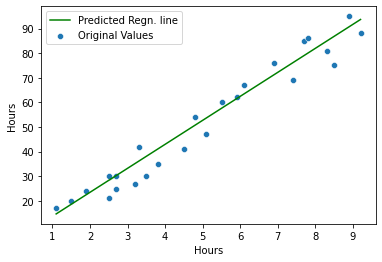

In [12]:
regline = lrm.intercept_+lrm.coef_*X
regline["Hours"].values
sns.lineplot(x=X['Hours'],y=regline.iloc[:,0],color='green',label='Predicted Regn. line')
sns.scatterplot(x='Hours',y=y,data=X,label='Original Values')
plt.legend()
plt.show()

As the model is trained, we can use our model for evaluation and predicition.

### 4. Evaluating the model

In [13]:
print("R squared value of training dataset: ", lrm.score(X_train, y_train))
print("R sqaured value of testing dataset: ",lrm.score(X_test, y_test))

R squared value of training dataset:  0.949466203326
R sqaured value of testing dataset:  0.9479567787445251


In [14]:
from sklearn.metrics import mean_squared_error as mse
print("Mean sqaured error of training dataset: ", mse(y_train,lrm.predict(X_train)))
print("Mean sqaured error of testing dataset: ", mse(y_test,lrm.predict(X_test)))

Mean sqaured error of training dataset:  29.9607711325601
Mean sqaured error of testing dataset:  32.461146082770384


As the R sqaured value for both our test and train dataset is almost equal and near to **0.95**, we can say that our model is accuracy is high.

### 5. Prediction using the model

As our model has trained and evaluated successfully, we can predict values using our model.

In [15]:
print("Predicted score when a student studies for 9.25 hrs/day is: ","%.2f"%lrm.predict([[9.25]])[0])

Predicted score when a student studies for 9.25 hrs/day is:  94.18
